### Import Basic Libraries

In [176]:
import numpy as np
import pandas as pd

### Introduce Data

In [177]:
df = pd.read_csv('football_salaries.csv')
df.head()

,position,player,team,age,total_value,avg_year,total_guaranteed,fully_guaranteed,free_agency
0,right-tackle,Trent Brown,Raiders,26,66000000,16500000,36250000,36250000,2023 UFA
1,right-tackle,Ja’Wuan James,Broncos,27,51000000,12750000,32000000,27000000,2023 UFA
2,right-tackle,Lane Johnson,Eagles,29,56250000,11250000,35500000,20862242,2022 Void
3,right-tackle,Ricky Wagner,Lions,30,47500000,9500000,29500000,17500000,2022 UFA
4,right-tackle,Rob Havenstein,Rams,26,32500000,8125000,16226365,9976365,2023 UFA


In [178]:
df['player'].duplicated().sum()

2655

In [179]:
df.drop_duplicates(subset = 'player', keep = 'first', inplace = True)
df

,position,player,team,age,total_value,avg_year,total_guaranteed,fully_guaranteed,free_agency
0,right-tackle,Trent Brown,Raiders,26,66000000,16500000,36250000,36250000,2023 UFA
1,right-tackle,Ja’Wuan James,Broncos,27,51000000,12750000,32000000,27000000,2023 UFA
2,right-tackle,Lane Johnson,Eagles,29,56250000,11250000,35500000,20862242,2022 Void
3,right-tackle,Ricky Wagner,Lions,30,47500000,9500000,29500000,17500000,2022 UFA
4,right-tackle,Rob Havenstein,Rams,26,32500000,8125000,16226365,9976365,2023 UFA
...,...,...,...,...,...,...,...,...,...
5271,wide-receiver,Teo Redding,Packers,0,495000,495000,0,0,2020 ERFA
5272,wide-receiver,Rashard Davis,Chiefs,24,495000,495000,0,0,2020 ERFA
5273,wide-receiver,Allen Lazard,Packers,24,975000,487500,0,0,2020 ERFA
5286,wide-receiver,Darvin Kidsy,Redskins,24,975000,487500,0,0,2020 ERFA


### Explore Data

#### Explore the 'position' column

In [180]:
# What are the different values?
df['position'].unique()

array(['right-tackle', '3-4-outside-linebacker', 'defensive-line',
       '3-4-defensive-end', 'linebacker', '4-3-defensive-tackle',
       'right-guard', 'left-guard', 'tight-end', 'left-tackle',
       '3-4-defensive-tackle', 'center', '4-3-defensive-end',
       'long-snapper', 'punter', 'defensive-back', 'safety', 'kicker',
       'wide-receiver', 'cornerback', 'quarterback', 'running-back',
       'fullback', '4-3-outside-linebacker', 'inside-linebacker',
       'edge-rusher'], dtype=object)

In [181]:
# How many values in each unique value?
df['position'].value_counts()

wide-receiver             382
cornerback                301
safety                    230
running-back              197
tight-end                 195
4-3-defensive-end         135
4-3-defensive-tackle      135
inside-linebacker         126
quarterback               118
left-tackle               103
right-tackle              100
right-guard                99
left-guard                 97
3-4-defensive-end          95
4-3-outside-linebacker     92
center                     88
linebacker                 84
3-4-outside-linebacker     67
punter                     44
kicker                     44
long-snapper               43
3-4-defensive-tackle       39
fullback                   22
defensive-line             21
defensive-back             10
edge-rusher                 1
Name: position, dtype: int64

In [182]:
# Which players are on the offensive and defensive tackles?
tackles = df.loc[df['position'].str.contains('tackle')]
tackles

,position,player,team,age,total_value,avg_year,total_guaranteed,fully_guaranteed,free_agency
0,right-tackle,Trent Brown,Raiders,26,66000000,16500000,36250000,36250000,2023 UFA
1,right-tackle,Ja’Wuan James,Broncos,27,51000000,12750000,32000000,27000000,2023 UFA
2,right-tackle,Lane Johnson,Eagles,29,56250000,11250000,35500000,20862242,2022 Void
3,right-tackle,Ricky Wagner,Lions,30,47500000,9500000,29500000,17500000,2022 UFA
4,right-tackle,Rob Havenstein,Rams,26,32500000,8125000,16226365,9976365,2023 UFA
...,...,...,...,...,...,...,...,...,...
2474,4-3-defensive-tackle,Jake Ceresna,Giants,2020,495000,495000,0,0,2020 ERFA
2476,4-3-defensive-tackle,Winston Craig,Steelers,24,495000,495000,0,0,2020 ERFA
2477,4-3-defensive-tackle,Nick Thurman,Patriots,24,495000,495000,0,0,2020 ERFA
2478,4-3-defensive-tackle,Cavon Walker,Chiefs,0,495000,495000,0,0,2020 ERFA


In [183]:
# Use pandas.iloc to find specific items on the dataframe

In [184]:
# The names of the people in the first two rows
tackles.iloc[0:2,1]

0      Trent Brown
1    Ja’Wuan James
Name: player, dtype: object

In [185]:
# The position, name, team, and age of the second and third rows 
tackles.iloc[1:3,0:4]

,position,player,team,age
1,right-tackle,Ja’Wuan James,Broncos,27
2,right-tackle,Lane Johnson,Eagles,29


#### Explore the 'team' column

In [186]:
team_value_counts = df['team'].value_counts()
team_value_counts.head()

Jaguars     93
Dolphins    93
Jets        92
Ravens      92
Bengals     92
Name: team, dtype: int64

In [187]:
import matplotlib.pyplot as plt
%matplotlib inline

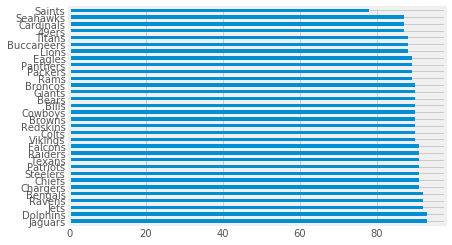

In [188]:
# Beginner version
teams_bar_graph = team_value_counts.plot(kind='barh')

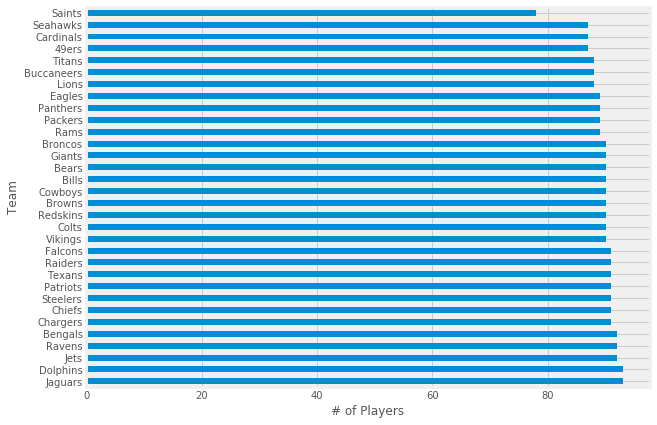

In [189]:
# Slighly more advanced

fig, ax = plt.subplots(figsize = (9,7))
team_bar = team_value_counts.plot(kind= 'barh')

plt.xlabel('# of Players')
plt.ylabel('Team')
plt.show()

In [190]:
# Yearly salary paid by the Raiders

df.loc[df['team']=='Raiders', 'avg_year'].sum()

206474078

In [191]:
# Yearly salary paid by each team
# Groupby is very helpful here since it iterated through every single team in the'team' column

yearly_salary_32 = df.groupby('team')['avg_year'].sum()
yearly_salary_32

team
49ers         220012286
Bears         205923520
Bengals       204187316
Bills         184723621
Broncos       197118929
Browns        218104947
Buccaneers    200418294
Cardinals     185722069
Chargers      184608054
Chiefs        187769170
Colts         193175657
Cowboys       179398192
Dolphins      157346629
Eagles        208516559
Falcons       210538646
Giants        190187388
Jaguars       216746539
Jets          207630893
Lions         199237198
Packers       219982000
Panthers      192619900
Patriots      206626713
Raiders       206474078
Rams          195806827
Ravens        171120303
Redskins      211454218
Saints        186537253
Seahawks      182699718
Steelers      212227086
Texans        202785801
Titans        210659478
Vikings       240800550
Name: avg_year, dtype: int64

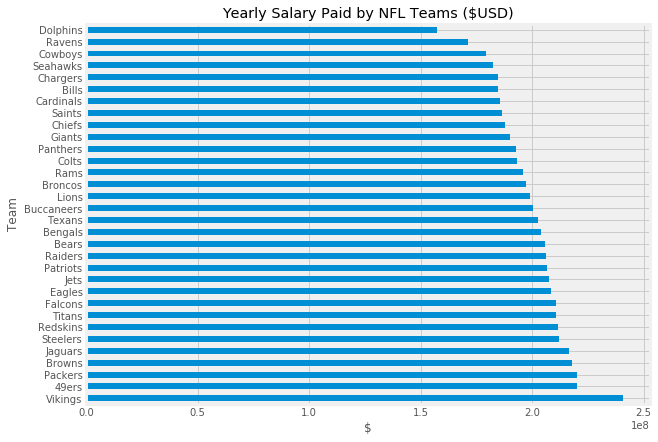

In [192]:
# Let's visualize the information above

fig, ax = plt.subplots(figsize = (9,7))
team_salary_bar = yearly_salary_32.sort_values(ascending=False).plot(kind= 'barh')

plt.xlabel('$')
plt.ylabel('Team')
plt.title('Yearly Salary Paid by NFL Teams ($USD)')
plt.show()

#### Explore the Saints

In [193]:
saints = df[df['team']=='Saints']
saints.head(10)

,position,player,team,age,total_value,avg_year,total_guaranteed,fully_guaranteed,free_agency
28,right-tackle,Ryan Ramczyk,Saints,25,8891810,2222953,7432291,7432291,2021 UFA
132,right-tackle,Michael Ola,Saints,31,805000,805000,0,0,2020 UFA
203,4-3-defensive-tackle,Malcom Brown,Saints,25,15000000,5000000,5500000,7500000,2022 UFA
207,defensive-line,Cameron Jordan,Saints,30,55000000,11000000,33469000,22969000,2021 UFA
239,right-guard,Larry Warford,Saints,28,34000000,8500000,17000000,17000000,2021 UFA
259,linebacker,Demario Davis,Saints,30,24000000,8000000,16000000,16000000,2021 Void
358,4-3-defensive-tackle,Sheldon Rankins,Saints,25,12801646,3200412,12801646,12801646,2021 UFA
373,left-guard,Nick Easton,Saints,27,22500000,5625000,4000000,4000000,2023 UFA
380,tight-end,Jared Cook,Saints,32,15000000,7500000,8000000,8000000,2021 Void
393,left-tackle,Terron Armstead,Saints,28,65000000,13000000,38000000,20880000,2022 UFA


In the original formation of the saints dataframe, there appeared to be repeats. Therefore, I went back to the original dataframe created and checked for these repeats before removing them

In [194]:
# Find the quarterbacks

saints_qbs = saints[saints['position']=='quarterback']
saints_qbs

,position,player,team,age,total_value,avg_year,total_guaranteed,fully_guaranteed,free_agency
1458,quarterback,Drew Brees,Saints,40,50000000,25000000,27000000,27000000,2020 Void
1783,quarterback,Teddy Bridgewater,Saints,27,7250000,7250000,7250000,7250000,2020 Void
3188,quarterback,Taysom Hill,Saints,29,1670000,556667,5000,5000,2020 RFA
3284,quarterback,J.T. Barrett,Saints,0,1080000,540000,0,0,2021 ERFA


In [195]:
# Total salary paid by the Saints for the year

saints_salary = df.loc[df['team']=='Saints', 'avg_year'].sum()
saints_salary

186537253

In [196]:
# % of the total yearly salary that the players are each taking up

saints['saints_salary_percent'] = saints['avg_year']/saints_salary
saints

C:\Users\josuy\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,position,player,team,age,total_value,avg_year,total_guaranteed,fully_guaranteed,free_agency,saints_salary_percent
28,right-tackle,Ryan Ramczyk,Saints,25,8891810,2222953,7432291,7432291,2021 UFA,0.011917
132,right-tackle,Michael Ola,Saints,31,805000,805000,0,0,2020 UFA,0.004315
203,4-3-defensive-tackle,Malcom Brown,Saints,25,15000000,5000000,5500000,7500000,2022 UFA,0.026804
207,defensive-line,Cameron Jordan,Saints,30,55000000,11000000,33469000,22969000,2021 UFA,0.058969
239,right-guard,Larry Warford,Saints,28,34000000,8500000,17000000,17000000,2021 UFA,0.045567
...,...,...,...,...,...,...,...,...,...,...
5059,wide-receiver,Austin Carr,Saints,26,1672500,557500,30000,30000,2020 RFA,0.002989
5080,wide-receiver,Dan Arnold,Saints,24,1665000,555000,0,0,2020 RFA,0.002975
5173,wide-receiver,Keith Kirkwood,Saints,25,1050000,525000,0,0,2020 ERFA,0.002814
5175,wide-receiver,Simmie Cobbs Jr.,Saints,24,1050000,525000,0,0,2020 ERFA,0.002814


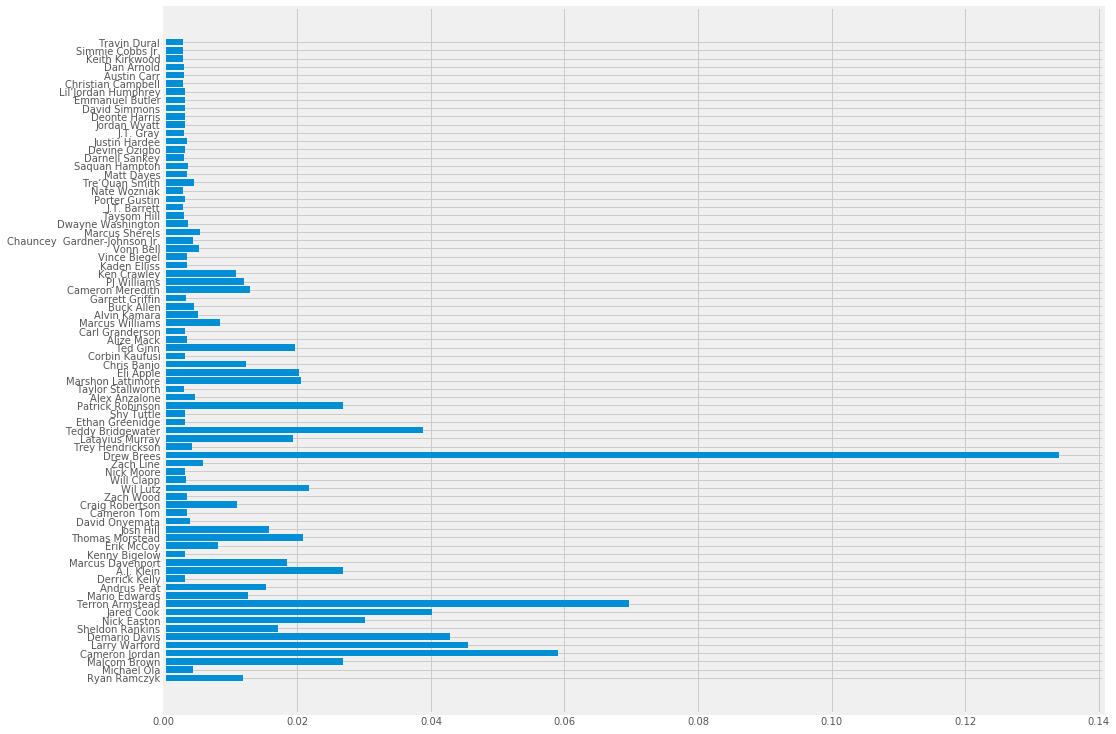

In [197]:
# Visualize with Matplotlib

fig, ax = plt.subplots(figsize = (15,13))
labels = saints['player']
values = saints['saints_salary_percent']

plt.barh(labels, values)  # Made it horizontal since the names would have been a mess vertically
plt.show()

In [198]:
# What percentage of the Saints players' contracts are 'fully' guaranteed?

saints['saints_percent_fully_guaranteed'] = saints['fully_guaranteed']/saints['total_value']
saints

C:\Users\josuy\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,position,player,team,age,total_value,avg_year,total_guaranteed,fully_guaranteed,free_agency,saints_salary_percent,saints_percent_fully_guaranteed
28,right-tackle,Ryan Ramczyk,Saints,25,8891810,2222953,7432291,7432291,2021 UFA,0.011917,0.835858
132,right-tackle,Michael Ola,Saints,31,805000,805000,0,0,2020 UFA,0.004315,0.000000
203,4-3-defensive-tackle,Malcom Brown,Saints,25,15000000,5000000,5500000,7500000,2022 UFA,0.026804,0.500000
207,defensive-line,Cameron Jordan,Saints,30,55000000,11000000,33469000,22969000,2021 UFA,0.058969,0.417618
239,right-guard,Larry Warford,Saints,28,34000000,8500000,17000000,17000000,2021 UFA,0.045567,0.500000
...,...,...,...,...,...,...,...,...,...,...,...
5059,wide-receiver,Austin Carr,Saints,26,1672500,557500,30000,30000,2020 RFA,0.002989,0.017937
5080,wide-receiver,Dan Arnold,Saints,24,1665000,555000,0,0,2020 RFA,0.002975,0.000000
5173,wide-receiver,Keith Kirkwood,Saints,25,1050000,525000,0,0,2020 ERFA,0.002814,0.000000
5175,wide-receiver,Simmie Cobbs Jr.,Saints,24,1050000,525000,0,0,2020 ERFA,0.002814,0.000000


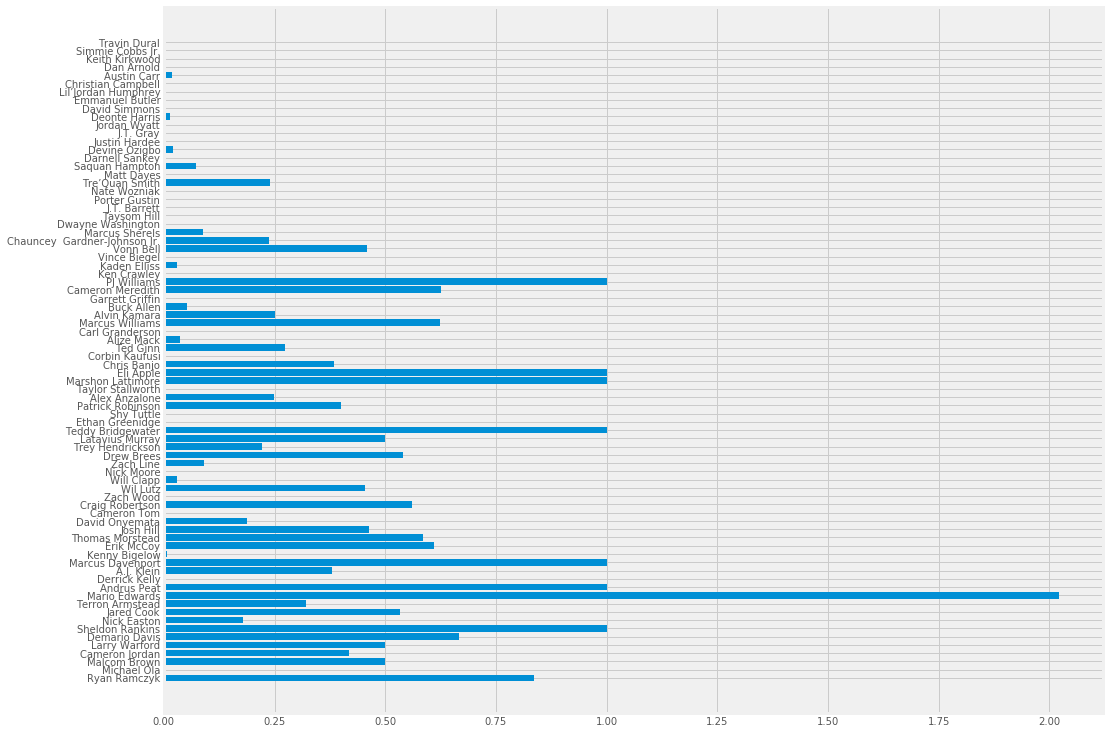

In [199]:
# Visualize

fig, ax = plt.subplots(figsize = (15,13))
labels_2 = saints['player']
values_2 = saints['saints_percent_fully_guaranteed']

plt.barh(labels_2, values_2)
plt.show()

These last two graphs are examples of visualizing categorical data, which in this case was the salary of each player(who represent categories). Next, I want to visualize the distribution of the Saints players' yearly deals through a histogram (numerical)

In [200]:
print(saints['avg_year'].min())
print(saints['avg_year'].max())
print(saints['avg_year'].mean())
print(saints['avg_year'].median())

525000
25000000
2391503.2435897435
799473.5


In [201]:
bins = np.arange(0, 26000000, 1000000)
bins

array([       0,  1000000,  2000000,  3000000,  4000000,  5000000,
        6000000,  7000000,  8000000,  9000000, 10000000, 11000000,
       12000000, 13000000, 14000000, 15000000, 16000000, 17000000,
       18000000, 19000000, 20000000, 21000000, 22000000, 23000000,
       24000000, 25000000])

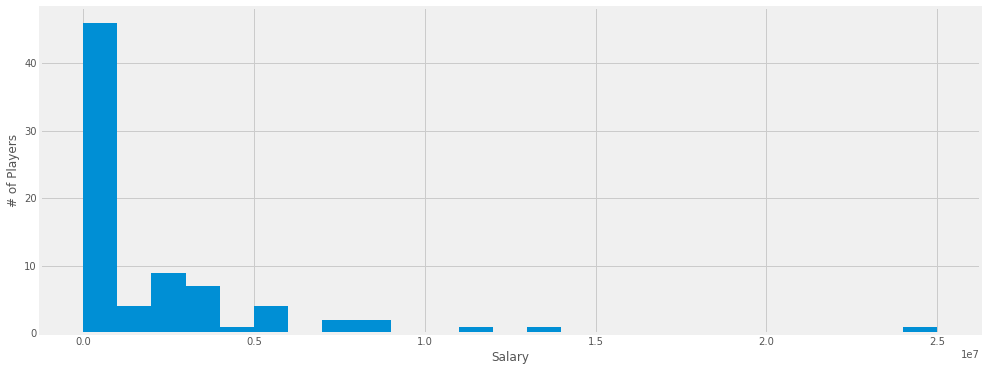

In [202]:
fig, ax = plt.subplots(figsize = (15,6))
plt.hist(saints['avg_year'], bins = bins)
plt.xlabel('Salary')
plt.ylabel('# of Players')
plt.show()

#### Explore 'Age'

In [203]:
df['age'].describe()

count    2868.000000
mean      182.179219
std       540.278799
min         0.000000
25%        24.000000
50%        25.000000
75%        28.000000
max      2020.000000
Name: age, dtype: float64

In [204]:
# Average age by team

avg_age_team = df.groupby('team')['age'].mean()
avg_age_team

team
49ers          69.528736
Bears          45.544444
Bengals       239.597826
Bills         224.000000
Broncos       134.655556
Browns         68.055556
Buccaneers    386.204545
Cardinals     297.758621
Chargers      461.989011
Chiefs        284.769231
Colts          24.566667
Cowboys       311.211111
Dolphins      388.376344
Eagles        248.775281
Falcons       352.472527
Giants         67.733333
Jaguars        67.946237
Jets          392.739130
Lions         294.590909
Packers       134.876404
Panthers      112.449438
Patriots       24.153846
Raiders        23.758242
Rams          426.651685
Ravens         88.228261
Redskins       89.488889
Saints        202.987179
Seahawks       22.229885
Steelers      152.670330
Texans        113.241758
Titans         25.613636
Vikings        47.655556
Name: age, dtype: float64

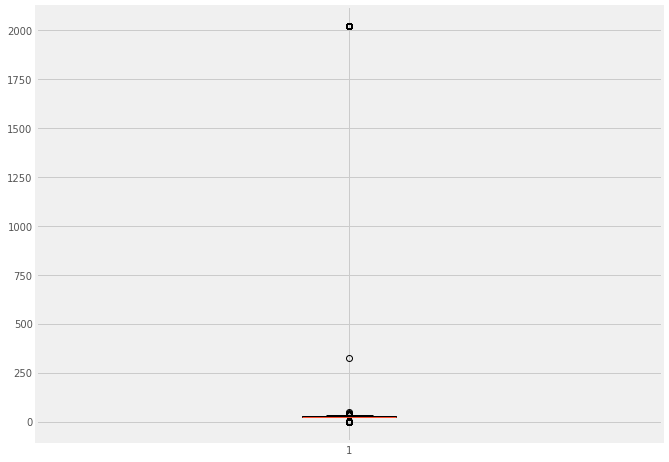

In [205]:
# We are getting weird values. Lets look at the distribtution of all ages through a box and whiskers first

fig, ax = plt.subplots(figsize = (10,8))
plt.boxplot(df['age'], medianprops = {'linewidth' : 1.0})
plt.show()

The outliers in this plot are making it very hard to look at the rest of the data. Let's make a new plot that does not include these values above 250

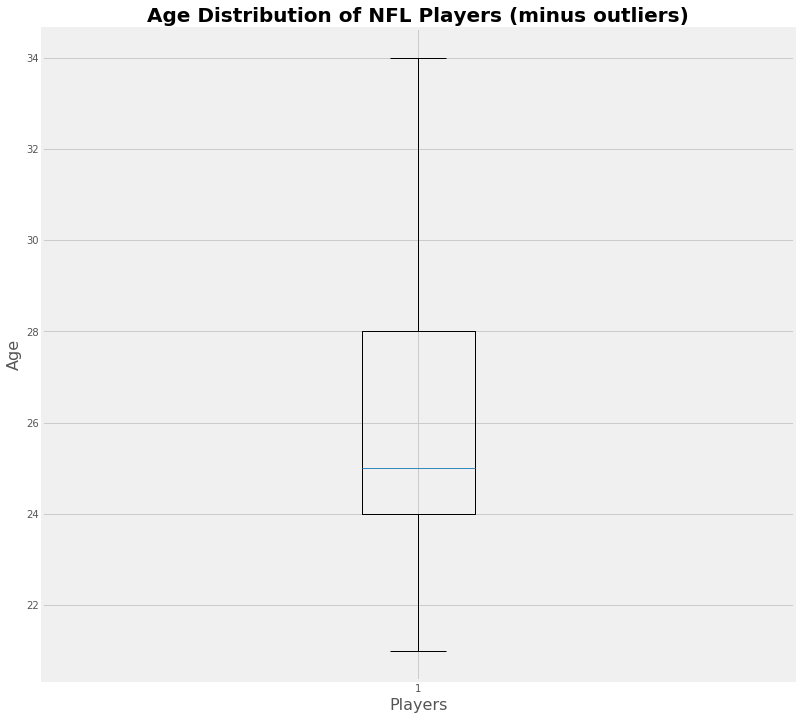

In [206]:
fig, ax = plt.subplots(figsize = (12,12))
ax.boxplot(df['age'], showfliers = False, medianprops = {'linewidth' : 1.0}) # Showfliers = False takes care of removing the outliers

plt.xlabel('Players', fontdict = {'fontsize': 16})
plt.ylabel('Age', fontdict = {'fontsize': 16})
plt.title('Age Distribution of NFL Players (minus outliers)', fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.style.use('ggplot')
plt.show()